In [1]:
from common import *
disable_fig_save = False 
save_loc = 'plots'
save_prefix="pathfinding"
config_common(disable_fig_save=disable_fig_save, save_loc=save_loc, save_prefix=save_prefix)
from colors import *

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import warnings

%config InlineBackend.figure_format = 'svg'

from os import path
from typing import Dict, List, Set

import matplotlib.ticker as mtick
import matplotlib as mpl
from scipy.stats.mstats import gmean
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, ScalarFormatter, LogLocator)
import matplotlib.patches as patches
import matplotlib.patches as mpatches
from matplotlib import rc

import seaborn as sns

In [3]:
init_notebook()
figsize = (8,1.65)
fontsize = 11

In [4]:
dataf = "../../data/map.btree.csv"

In [5]:
!sha256sum $dataf

cd126f183df2d8d783a3b83bc1c3be104a0b86579f4a8373df780fdbce00e465  ../../data/map.btree.csv


In [6]:
df = pd.read_csv(dataf, index_col=None)
df = df.set_index('operation')
df

,pmdk,snapshot,msync,msync huge pages
operation,,,,
insert,1.307747,1.1893,2.3247,59.6691
delete,1.477636,1.6479,4.1959,90.5175
read,0.286011,0.0653,0.0710,0.0599


In [7]:
pmdk_col = df['pmdk']
df_norm = df.copy(deep=True)
for col in df:
    df_norm[col] = df[col]/pmdk_col
df_norm

,pmdk,snapshot,msync,msync huge pages
operation,,,,
insert,1.0,0.909427,1.777637,45.627403
delete,1.0,1.115227,2.839603,61.258321
read,1.0,0.228313,0.248242,0.209433


In [14]:
Fig.config(16, (8, 2))

Plot saved as `plots/pathfinding/map.btree.png`

Plot saved as `plots/pathfinding/map.btree.png`

Using pdfcrop on `plots/pathfinding/map.btree.png` with command `pdfcrop plots/pathfinding/map.btree.pdf plots/pathfinding/map.btree.pdf`

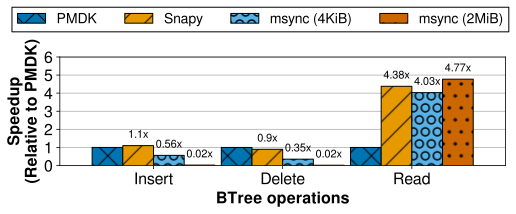

In [18]:
plt.rcParams["font.family"] = "freesans"
speedup = 1/df_norm
speedup = capitalize_index(speedup)
speedup = rename_cols(speedup, {'pmdk': u'PMDK', 'snapshot': u'Snapy', 'msync': 'msync (4KiB)', 'msync huge pages': 'msync (2MiB)'})
ax = speedup.plot.bar(**Fig.get_kwargs(width=0.95))
f = Fig(ax)
ax.set_ylim((0, 6))

# f.fmt_label('YCSB benchmarks', 'Relative performance')
f.fmt_label('BTree operations', 'Speedup\n(Relative to PMDK)')
f.add_bar_labels([False, True, True, True], precision=2, fontsize=fontsize, over_fig=False, alpha=0)
f.xrot(rot=0)
f.fmt_grid(axis='y')
ax.set_yticks(np.arange(0, 6.1, 1))



bars = ax.patches
hatches = ''.join(h*len(df_norm) for h in 'x/O.')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

f.fmt_legend(ncol=4, y_off_scale=1.05, x_off_scale=0.9, fontsize=14)

save_fig('map.btree')

In [10]:
df_norm

,pmdk,snapshot,msync,msync huge pages
operation,,,,
insert,1.0,0.909427,1.777637,45.627403
delete,1.0,1.115227,2.839603,61.258321
read,1.0,0.228313,0.248242,0.209433
